# Tensorflowing (small stream)

In [31]:
%matplotlib inline
import tensorflow as tf
from skimage import data
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# create a tf Tensor that holds 100 values evenly spaced from -3 to 3
x = tf.linspace(-3.0, 3.0, 100)
print(x)

Tensor("LinSpace:0", shape=(100,), dtype=float32)


In [3]:
# create a graph (holds the theory of the computation)
g = tf.get_default_graph()

In [4]:
[op.name for op in g.get_operations()]

['LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace']

In [5]:
sess = tf.Session()

In [6]:
computed_x = sess.run(x)

In [7]:
print(computed_x)

[-3.         -2.939394   -2.87878799 -2.81818175 -2.75757575 -2.69696975
 -2.63636351 -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.33333325
 -2.27272725 -2.21212125 -2.15151501 -2.090909   -2.030303   -1.969697
 -1.90909088 -1.84848475 -1.78787875 -1.72727275 -1.66666663 -1.6060605
 -1.5454545  -1.4848485  -1.42424238 -1.36363626 -1.30303025 -1.24242425
 -1.18181813 -1.12121201 -1.060606   -1.         -0.939394   -0.87878776
 -0.81818175 -0.75757575 -0.69696951 -0.63636351 -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333325 -0.27272725 -0.21212101 -0.15151501
 -0.090909   -0.030303    0.030303    0.09090924  0.15151525  0.21212125
  0.27272749  0.33333349  0.3939395   0.4545455   0.5151515   0.57575774
  0.63636374  0.69696975  0.75757599  0.81818199  0.87878799  0.939394    1.
  1.060606    1.12121201  1.18181849  1.24242449  1.30303049  1.36363649
  1.4242425   1.4848485   1.5454545   1.60606098  1.66666698  1.72727299
  1.78787899  1.84848499  1.909091    1.969697    2

In [8]:
sess.close()

# Vermessung der Welt

In [22]:
mean = 0
sigma = 1.0

In [10]:
# I do not understand this formula, it is just copied... :/
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                  (2.0 * tf.pow(sigma, 2.0)))) *
    (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

In [15]:
sess = tf.Session()

In [16]:
graph = sess.run(z)

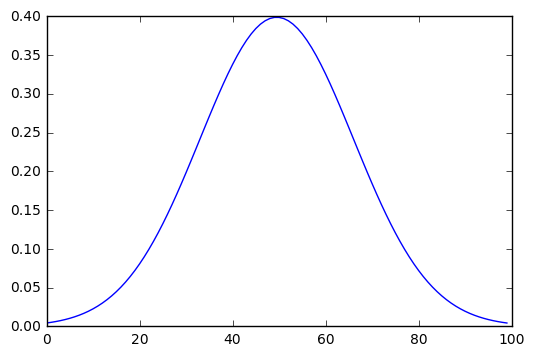

In [21]:
plt.plot(graph)

In [83]:
# what exactly is this? the shape dimensions of the gaussian curve
ksize = z.get_shape().as_list()[0]
ksize

100

In [24]:
# essentially it seems we're just multiplying two gaussians, but don't ask me what's going on
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))

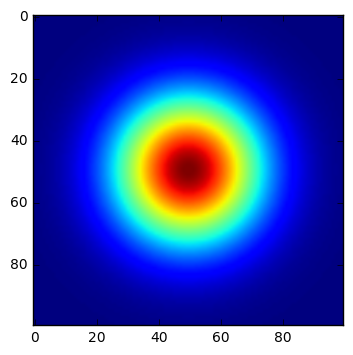

In [25]:
# run the session with the new operations (graph?) fed to it
graph_2d = sess.run(z_2d)
# display the 2D gaussian as an image
plt.imshow(graph_2d)

# Creating a Collection

## at first, a detour

http://sipi.usc.edu/database/database.php/n/database.php?volume=misc

In [35]:
dir(data)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binary_blobs',
 '_os',
 'astronaut',
 'binary_blobs',
 'camera',
 'checkerboard',
 'chelsea',
 'clock',
 'coffee',
 'coins',
 'data_dir',
 'deprecated',
 'horse',
 'hubble_deep_field',
 'immunohistochemistry',
 'imread',
 'lena',
 'load',
 'moon',
 'page',
 'rocket',
 'text',
 'use_plugin']

In [93]:
# or do the tab trick

In [61]:
# get a list of all the actual imgs available as attributes
img_list = [i for i in dir(data) if not i.startswith("_")]
non_imgs = ['use_plugin', 'deprecated', 'binary_blobs', 'data_dir', 'imread', 'load', 'lena']
for ni in non_imgs:
    img_list.remove(ni)
img_list

['astronaut',
 'camera',
 'checkerboard',
 'chelsea',
 'clock',
 'coffee',
 'coins',
 'horse',
 'hubble_deep_field',
 'immunohistochemistry',
 'moon',
 'page',
 'rocket',
 'text']

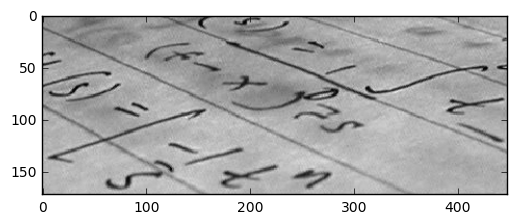

In [62]:
# a horrible way of getting (not quite) what I wanted :D
# haha, oh well...
for i in img_list:
    img = eval("data." + i + "().astype(np.float32)")
    plt.imshow(img, cmap="gray")

okay, that's the end of the detour. :) haha, I just did things one shouldn't do. back to normality.

## now the real thing

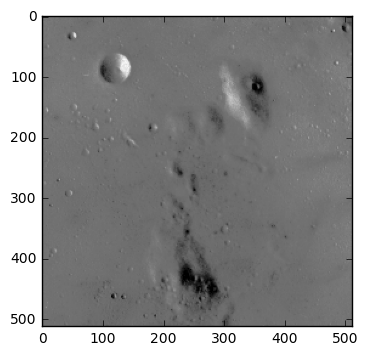

In [80]:
img = data.moon().astype(np.float32)
plt.imshow(img, cmap="gray")

In [81]:
img.shape

(512, 512)

In [82]:
# seems we need a 4D tensor for fun times, so let's do it
img_4d = tf.reshape(img, [1, img.shape[0], img.shape[1], 1])
img_4d.get_shape()

TensorShape([Dimension(1), Dimension(512), Dimension(512), Dimension(1)])

In [85]:
# reshaping the kernel works somewhat differently: [Kh, Kw, C, NK]
kernel_height, kernel_width = ksize, ksize
channels, num_kernels = 1, 1

z_4d = tf.reshape(z_2d, [kernel_height, kernel_width, channels, num_kernels])

In [86]:
print(z_4d.get_shape().as_list())

[100, 100, 1, 1]


In [88]:
# now we're doing some convolution stuff

convolved = tf.nn.conv2d(img_4d, z_4d, strides=[1, 1, 1, 1], padding="SAME")

res_4d = sess.run(convolved)

In [91]:
print(res_4d.shape)

(1, 512, 512, 1)


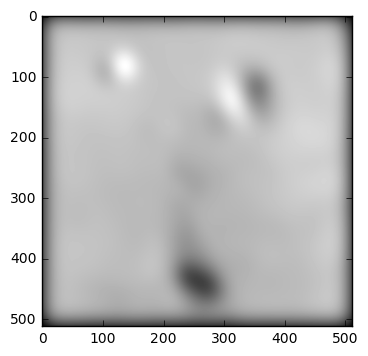

In [92]:
# matplotlib can't visualize 4d images, so we need to convert it back to original height and width
plt.imshow(np.squeeze(res_4d), cmap="gray")

^ it seems that I surprised the moon! : o